<a href="https://colab.research.google.com/github/zainsuch19/entropy-neural-network/blob/main/entropy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an
an input signal, my network will output a single representing its shannons entropy'''

'Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an \nan input signal, my network will output a single representing its shannons entropy'

In [ ]:
'''We will generate synthetic data that represents signal segments and their
corresponding shannon entropy
H(X) = -sum(p(x)log(p(x)))
'''

In [2]:
import numpy as np

def generate_synthetic_data(num_samples=10000, num_bins=10):
    X = np.random.rand(num_samples, 100)  # Generate random input data
    y = []

    for sample in X:
        hist, _ = np.histogram(sample, bins=num_bins, range=(0, 1), density=True)
        hist += 1e-9  # Prevent log(0)
        entropy = -np.sum(hist * np.log(hist))
        y.append(entropy)

    y = np.array(y).reshape(-1, 1)
    return X, y

# Example of generating data
X, y = generate_synthetic_data()
print(X.shape, y.shape)  # Should output (10000, 100), (10000, 1)


(10000, 100) (10000, 1)


In [5]:
#Implementing several dense layers with ReLU(Rectified Linear Unit)

import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,297 (91.00 KB)

 Trainable params: 23,297 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
'''Now choosing a loss function. For this task mean squared error is a good choice'''
#Training the model
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0607 - mae: 0.1921 - val_loss: 0.0422 - val_mae: 0.1632
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0501 - mae: 0.1730 - val_loss: 0.0416 - val_mae: 0.1615
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0492 - mae: 0.1719 - val_loss: 0.0421 - val_mae: 0.1615
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0486 - mae: 0.1689 - val_loss: 0.0461 - val_mae: 0.1763
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0469 - mae: 0.1692 - val_loss: 0.0424 - val_mae: 0.1607
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0475 - mae: 0.1689 - val_loss: 0.0426 - val_mae: 0.1611
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0465 - mae: 0.1682 - val_loss: 0.0416 - val_mae: 0.1617
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0446 - mae: 0.1635 - val_loss: 0.0417 - val_mae: 0.1625
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


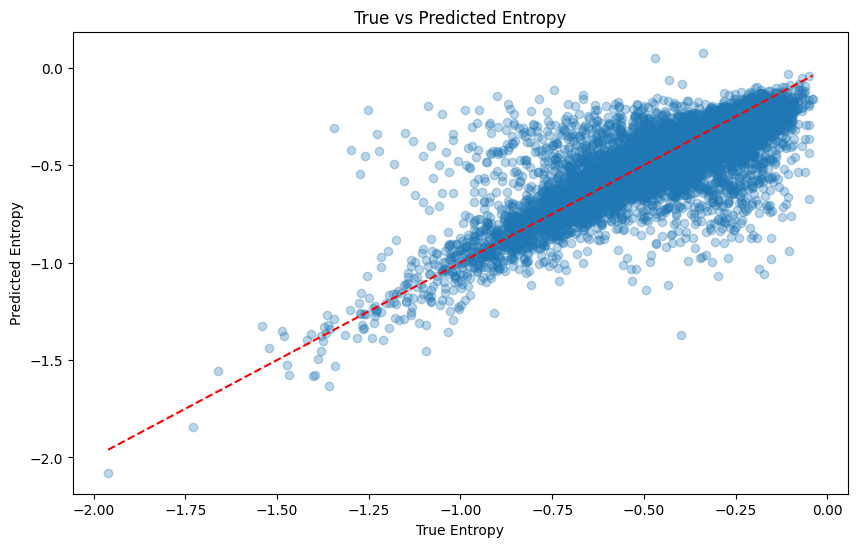

In [7]:
import matplotlib.pyplot as plt

# Predict entropy for the test data
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of equality
plt.xlabel("True Entropy")
plt.ylabel("Predicted Entropy")
plt.title("True vs Predicted Entropy")
plt.show()
